# Imports

In [1]:
import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
import time
from numba import njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types

# Pure python function

In [2]:
def solve_2d_burger_pure(u, un, v, vn, nt, dt, dx, dy, nu):
    row, col = u.shape
    # setting the initial condition
    u[int(.5/dy):int(1/dy + 1), int(.5/dx):int(1/dx + 1)] = 2
    v[int(.5/dy):int(1/dy + 1), int(.5/dx):int(1/dx + 1)] = 2
    for n in range(nt):
        for j in range(col):
            for k in range(col):
                un[j, k] = u[j, k]
                vn[j, k] = v[j, k]
        for i in range(1, row-1):
            for j in range(1, col-1):
                u[i,j] = un[i,j] - (dt/dx)*un[i,j]*(un[i,j] - un[i-1,j]) - (dt/dy)*vn[i,j]*(un[i,j] - un[i,j-1])
                u[i,j] = u[i,j] + (nu*dt/dx**2)*(un[i+1,j] - 2*un[i,j] + un[i-1,j]) + (nu*dt/dy**2)*(un[i,j+1] - 2*un[i,j] + un[i,j-1])
                v[i,j] = vn[i,j] - (dt/dx)*un[i,j]*(vn[i,j] - vn[i-1,j]) - (dt/dy)*vn[i,j]*(vn[i,j] - vn[i,j-1])
                v[i,j] = v[i,j] + (nu*dt/dx**2)*(vn[i+1,j] - 2*vn[i,j] + vn[i-1,j]) + (nu*dt/dy**2)*(vn[i,j+1] - 2*vn[i,j] + vn[i,j-1])
    return 0

# Numba accelerator

In [3]:
@njit(fastmath=True)
def solve_2d_burger_numba(u, un, v, vn, nt, dt, dx, dy, nu):
    row, col = u.shape
    # setting the initial condition
    u[int(.5/dy):int(1/dy + 1), int(.5/dx):int(1/dx + 1)] = 2
    v[int(.5/dy):int(1/dy + 1), int(.5/dx):int(1/dx + 1)] = 2
    for n in range(nt):
        for j in range(col):
            for k in range(col):
                un[j, k] = u[j, k]
                vn[j, k] = v[j, k]
        for i in range(1, row-1):
            for j in range(1, col-1):
                u[i,j] = un[i,j] - (dt/dx)*un[i,j]*(un[i,j] - un[i-1,j]) - (dt/dy)*vn[i,j]*(un[i,j] - un[i,j-1])
                u[i,j] = u[i,j] + (nu*dt/dx**2)*(un[i+1,j] - 2*un[i,j] + un[i-1,j]) + (nu*dt/dy**2)*(un[i,j+1] - 2*un[i,j] + un[i,j-1])
                v[i,j] = vn[i,j] - (dt/dx)*un[i,j]*(vn[i,j] - vn[i-1,j]) - (dt/dy)*vn[i,j]*(vn[i,j] - vn[i,j-1])
                v[i,j] = v[i,j] + (nu*dt/dx**2)*(vn[i+1,j] - 2*vn[i,j] + vn[i-1,j]) + (nu*dt/dy**2)*(vn[i,j+1] - 2*vn[i,j] + vn[i,j-1])
    return 0

# Pyccel accelerator

In [4]:
@types('float[:,:]', 'float[:,:]', 'float[:,:]', 'float[:,:]', 'int', 'float', 'float', 'float', 'float')
def solve_2d_burger_pyccel(u, un, v, vn, nt, dt, dx, dy, nu):
    row, col = u.shape
    # setting the initial condition
    u[int(.5/dy):int(1/dy + 1), int(.5/dx):int(1/dx + 1)] = 2
    v[int(.5/dy):int(1/dy + 1), int(.5/dx):int(1/dx + 1)] = 2
    for n in range(nt):
        for j in range(col):
            for k in range(col):
                un[j, k] = u[j, k]
                vn[j, k] = v[j, k]
        for i in range(1, row-1):
            for j in range(1, col-1):
                u[i,j] = un[i,j] - (dt/dx)*un[i,j]*(un[i,j] - un[i-1,j]) - (dt/dy)*vn[i,j]*(un[i,j] - un[i,j-1])
                u[i,j] = u[i,j] + (nu*dt/dx**2)*(un[i+1,j] - 2*un[i,j] + un[i-1,j]) + (nu*dt/dy**2)*(un[i,j+1] - 2*un[i,j] + un[i,j-1])
                v[i,j] = vn[i,j] - (dt/dx)*un[i,j]*(vn[i,j] - vn[i-1,j]) - (dt/dy)*vn[i,j]*(vn[i,j] - vn[i,j-1])
                v[i,j] = v[i,j] + (nu*dt/dx**2)*(vn[i+1,j] - 2*vn[i,j] + vn[i-1,j]) + (nu*dt/dy**2)*(vn[i,j+1] - 2*vn[i,j] + vn[i,j-1])
    return 0

# Inputs

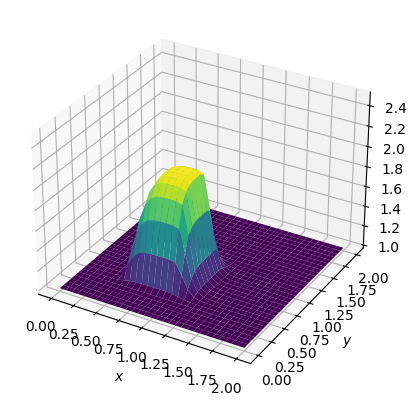

In [5]:
###variable declarations
nx = 31
ny = 31
nt = 120
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .0009
nu = 0.01
dt = sigma * dx * dy / nu


x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx))  # create a 1xn vector of 1's
v = np.ones((ny, nx))
un = np.ones((ny, nx)) 
vn = np.ones((ny, nx))

solve_2d_burger_pure(u, un, v, vn, nt, dt, dx, dy, nu)

X, Y = np.meshgrid(x, y)
fig = pyplot.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, antialiased=True)
ax.set_zlim(1, 2.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

# Call Functions

# Pure function

In [6]:
%timeit solve_2d_burger_pure(u, un, v, vn, nt, dt, dx, dy, nu)

1 loop, best of 3: 901 ms per loop


# Function with numba accelerator

In [7]:
%timeit solve_2d_burger_numba(u, un, v, vn, nt, dt, dx, dy, nu)

The slowest run took 840.23 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 949 µs per loop


# Function with pyccel accelerator

In [9]:
solve_2d_burger_f90 = epyccel(solve_2d_burger_pyccel)

In [10]:
%timeit solve_2d_burger_f90(u, un, v, vn, nt, dt, dx, dy, nu)

1000 loops, best of 3: 463 µs per loop
